c:\Users\z\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 56s 440ms/step - accuracy: 0.7616 - loss: 0.8190
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 51s 425ms/step - accuracy: 0.9717 - loss: 0.1047
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 56s 466ms/step - accuracy: 0.9835 - loss: 0.0614
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 51s 424ms/step - accuracy: 0.9881 - loss: 0.0438
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 498ms/step - accuracy: 0.9910 - loss: 0.0349
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 470ms/step - accuracy: 0.9936 - loss: 0.0267
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 62s 513ms/step - accuracy: 0.9955 - loss: 0.0199
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 61s 505ms/step - accuracy: 0.9961 - loss: 0.0174
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 58s 482ms/step - accuracy: 0.9975 - loss: 0.0134
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 58s 484ms/step - accuracy: 0.9982 - loss: 0.0106
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 524ms/step - accuracy: 0.9983 - loss: 0.0094
Epoch 12/12
120/120

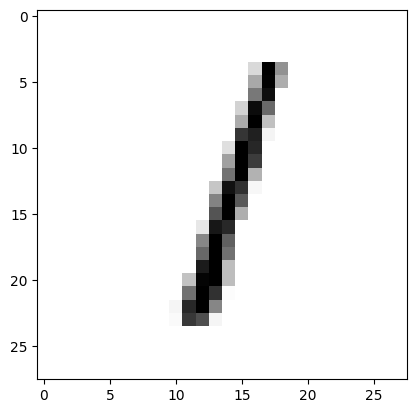

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, Flatten, Dropout

# Load the MNIST dataset
file_path = './mnist.npz'
with np.load(file_path) as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

# Preprocess data
# Convert integer pixel values to float for better computation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize pixel values to the range [0, 1] for better training
X_train /= 255
X_test /= 255

# One-hot encode target labels (convert class vectors to binary matrices)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Define the convolutional neural network (CNN) model
model = Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel size, ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Second convolutional layer with 64 filters, 3x3 kernel size, ReLU activation
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling layer for downsampling
    MaxPooling2D(pool_size=(2, 2)),  # Updated pool size to match MNIST image dimensions
    # Dropout layer to prevent overfitting (20% chance of dropping a neuron)
    Dropout(0.2),
    # Flatten the layer before feeding into dense layers
    Flatten(),
    # First dense layer with 250 neurons and sigmoid activation
    Dense(250, activation='sigmoid'),
    # Output layer with 10 neurons (one for each digit class) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model: optimizer, loss function, and metrics
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=12, batch_size=500)

# Evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions on the test data
predictions = model.predict(X_test)

# Get the predicted class for a specific example (index 2)
predicted_class = np.argmax(np.round(predictions[2]))  # Assuming you want to predict the class for index 2
print('Predicted class for example', 2, ':', predicted_class)

# Visualize the predicted digit (example index 2)
plt.imshow(X_test[2].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
